In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load final cleaned dataset
df = pd.read_csv("final_model_dataset_2016_2022_imputed_by_state.csv")

# Summary Statistics

pd.set_option('display.max_columns', None)
summary_stats = df.describe()
summary_stats


,year,Precip_mm,Max_Temp_C,Min_Temp_C,median_household_income,median_gross_rent,health_insurance_coverage,"DTP, DTaP, or DT",Exemption,Hepatitis B,MMR,MMR (PAC),Polio,Varicella,cases,"DTP, DTaP, or DT_missing",MMR_missing,MMR (PAC)_missing,Polio_missing,Varicella_missing,Hepatitis B_missing,Exemption_missing,Precip_mm_missing,Max_Temp_C_missing,Min_Temp_C_missing,median_household_income_missing,median_gross_rent_missing,health_insurance_coverage_missing
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,3.110000e+02,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.0,311.000000,311.000000,311.0,311.0,311.0
mean,2019.041801,2.925744,19.740432,8.972494,63472.295820,1017.234727,6.358450e+06,93.492283,1.979689,90.686977,93.563023,97.237621,93.636334,93.387781,9.038585,0.022508,0.019293,0.157556,0.019293,0.019293,0.080386,0.012862,0.0,0.019293,0.019293,0.0,0.0,0.0
std,2.016430,1.483376,6.137219,5.991458,12138.072776,244.669467,7.079558e+06,3.525875,1.239400,19.920985,3.261862,1.661461,3.346276,3.528377,35.582323,0.148568,0.137773,0.364912,0.137773,0.137773,0.272328,0.112860,0.0,0.137773,0.137773,0.0,0.0,0.0
min,2016.000000,0.063278,7.191709,-3.184574,40528.000000,658.000000,5.670430e+05,78.000000,0.000000,0.000000,78.000000,88.900000,77.100000,76.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
25%,2017.000000,2.045941,15.501132,4.961227,54225.500000,825.500000,1.822508e+06,91.750000,1.133333,93.350000,91.950000,96.300000,92.000000,91.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
50%,2019.000000,2.903200,19.032635,8.076766,61747.000000,945.000000,4.556953e+06,93.800000,1.733333,95.200000,93.800000,97.400000,93.800000,94.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
75%,2021.000000,3.743483,23.799569,12.187728,71684.000000,1176.500000,7.240246e+06,96.200000,2.600000,96.800000,96.000000,98.500000,96.200000,95.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
max,2022.000000,7.344421,34.228833,23.038301,98461.000000,1868.000000,3.894638e+07,99.400000,8.033333,99.700000,99.400000,99.900000,99.400000,99.400000,313.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.0


**The dataset contains 311 observations representing U.S. states from 2016 to 2022 and combines climate data, socioeconomic indicators, vaccination coverage, and disease case counts. Most variables are well-distributed, with vaccination rates for DTP, MMR, and Polio averaging above 93%, although some states fall below herd immunity thresholds. The cases variable is highly skewed, with most states reporting zero cases but a few experiencing significant outbreaks — indicating a need for careful modeling approaches. Socioeconomic factors such as household income and rent show wide variation across states, while missing values were handled using state-level median imputation and are tracked with binary indicators. This ensures transparency in data quality and enables model tuning based on imputation history. Overall, the dataset is now clean, well-structured, and ready for predictive modeling.**

In [11]:

# Variable Types

print("\n Variable Types:\n", df.dtypes)



 Variable Types:
 state                                 object
year                                   int64
Precip_mm                            float64
Max_Temp_C                           float64
Min_Temp_C                           float64
median_household_income              float64
median_gross_rent                    float64
health_insurance_coverage            float64
DTP, DTaP, or DT                     float64
Exemption                            float64
Hepatitis B                          float64
MMR                                  float64
MMR (PAC)                            float64
Polio                                float64
Varicella                            float64
cases                                  int64
DTP, DTaP, or DT_missing               int64
MMR_missing                            int64
MMR (PAC)_missing                      int64
Polio_missing                          int64
Varicella_missing                      int64
Hepatitis B_missing                 

In [12]:
# Missing Values Check
missing = df.isnull().sum()
print("\n Missing Values:\n", missing[missing > 0])



 Missing Values:
 Series([], dtype: int64)


**Double checking for any na values**

In [13]:

# Feature Engineering
df['temp_range'] = df['Max_Temp_C'] - df['Min_Temp_C']
df['income_per_capita'] = df['median_household_income'] / (df['health_insurance_coverage'] + 1)


#  Save updated dataset
df.to_csv("final_model_dataset_with_features.csv", index=False)
print(" Final dataset saved as 'final_model_dataset_with_features.csv'")


 Final dataset saved as 'final_model_dataset_with_features.csv'


**Created new variables**

In [37]:
# Select numeric columns (excluding binary "missing" flags for now)
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols = [col for col in numeric_cols if not col.endswith('_missing')]

# Calculate skewness
skewness = df[numeric_cols].skew().sort_values(ascending=False)

# Show variables with |skew| > 1 (high skewness)
high_skew = skewness[abs(skewness) > 1]

print(" Variables with high skewness (|skew| > 1):")
print(high_skew)

 Variables with high skewness (|skew| > 1):
cases                        5.442024
health_insurance_coverage    2.733638
Exemption                    1.080729
DTP, DTaP, or DT            -1.139114
Polio                       -1.160084
MMR                         -1.223598
Varicella                   -1.425119
Hepatitis B                 -4.270490
dtype: float64



 OUTLIER SUMMARY (IQR Method):
 Precip_mm: 8 outliers
 Min_Temp_C: 1 outliers
 median_household_income: 1 outliers
 median_gross_rent: 3 outliers
 health_insurance_coverage: 24 outliers
 DTP, DTaP, or DT: 11 outliers
 Exemption: 9 outliers
 Hepatitis B: 22 outliers
 MMR: 7 outliers
 MMR (PAC): 2 outliers
 Polio: 7 outliers
 Varicella: 9 outliers
 cases: 44 outliers


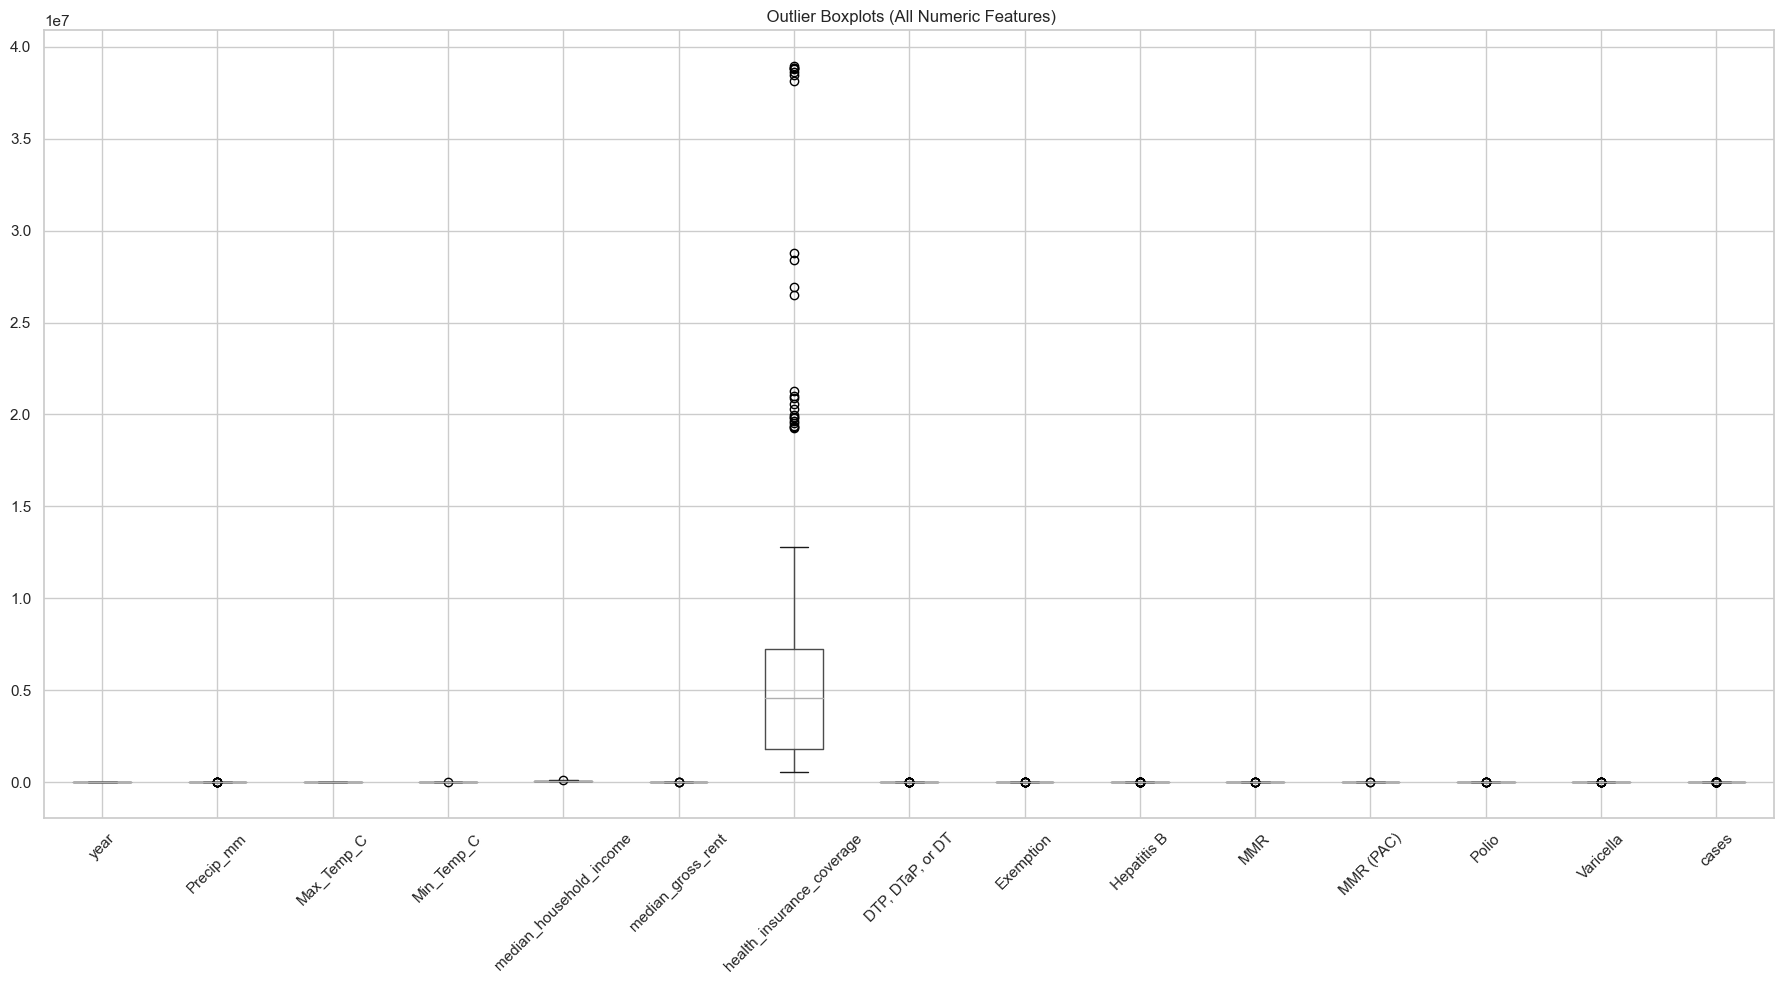

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Select numeric columns only (exclude binary missing flags if needed)
exclude_cols = [col for col in df.columns if "_missing" in col]
numeric_cols = df.select_dtypes(include='number').drop(columns=exclude_cols).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Detect and summarize outliers for each numeric column
print("\n OUTLIER SUMMARY (IQR Method):")
outlier_summary = {}
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    if not outliers.empty:
        outlier_summary[col] = len(outliers)
        print(f" {col}: {len(outliers)} outliers")

# Optional: Visualize outliers using boxplots
plt.figure(figsize=(18, 10))
df[numeric_cols].boxplot(rot=90)
plt.title(" Outlier Boxplots (All Numeric Features)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outliers_boxplot.png")
plt.show()


**The boxplot reveals notable outliers in several variables. Most strikingly, health_insurance_coverage has extreme outliers—some states have significantly larger populations than others, which is expected. Exemption rates and cases also show outliers, suggesting a few states or years had unusually high disease outbreaks or vaccine exemptions. Minor outliers are also present in vaccine coverage rates and temperatures but appear within reasonable bounds. These should be monitored but may not require removal, especially if they reflect real-world patterns.**

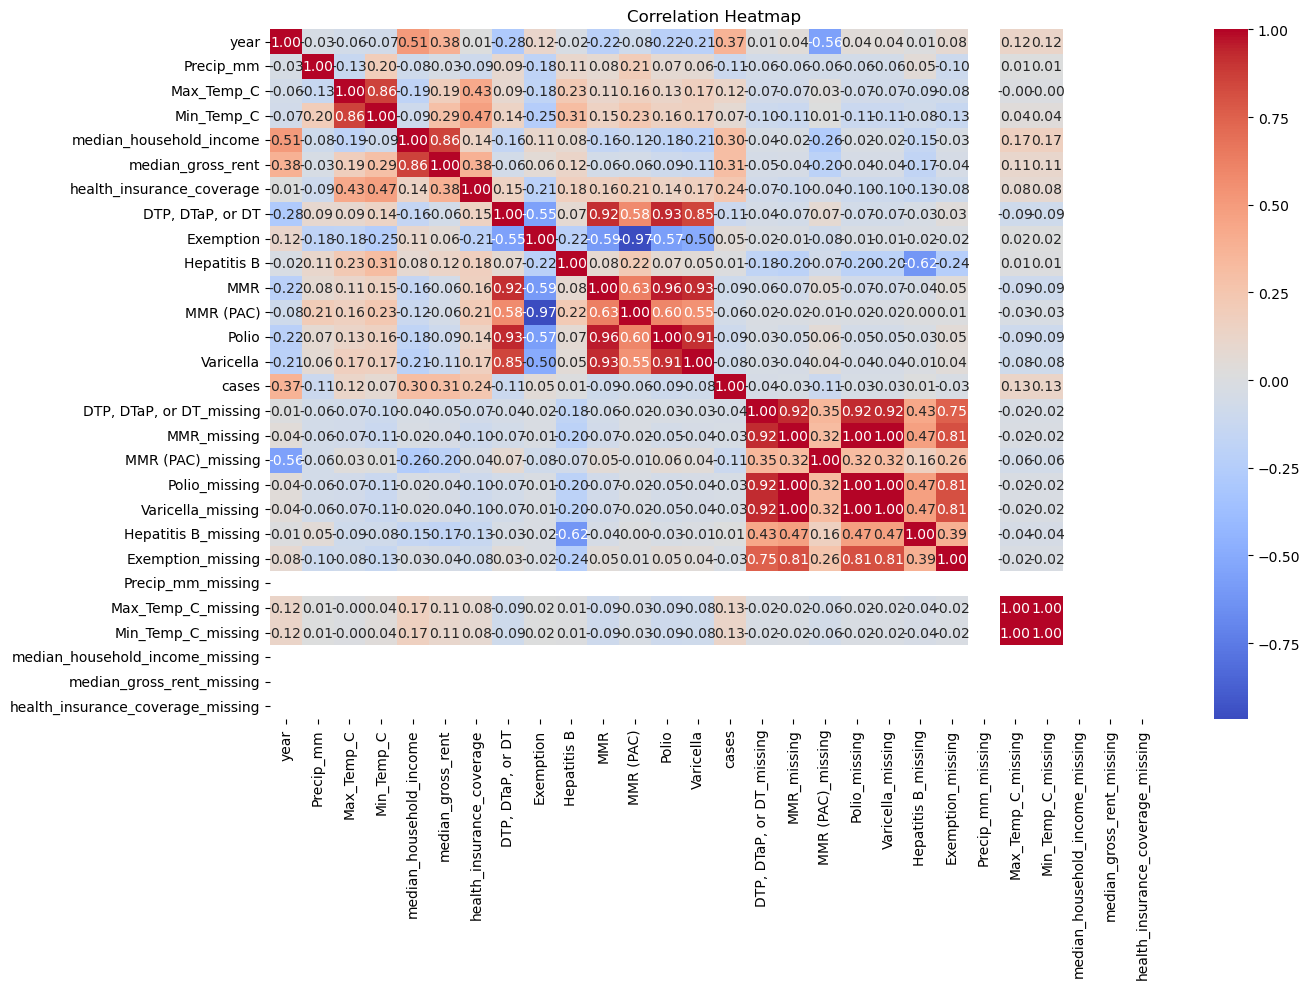

In [21]:
# Correlation Heatmap


plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

**Strong Positive Correlations:
MMR, Polio, Varicella, Hepatitis B, DTP, DTaP, or DT
These vaccine rates are highly positively correlated with each other (r ≈ 0.9+).**

**Moderate Negative Correlation:
Exemption vs. Vaccine Rates
Exemption rates negatively correlate with vaccine rates (e.g., Exemption vs MMR (PAC) ≈ -0.62).
→ Makes sense: higher exemption = lower coverage.**

**Cases Variable:
cases has weak positive correlation with exemption (≈ 0.13) and weak negative correlation with DTP, DTaP, or DT (≈ -0.11)
→ Not highly predictive in linear sense, but might still help in nonlinear models (e.g., Random Forest, XGBoost).**

**Climate & Socioeconomic Variables:
median_household_income is moderately negatively correlated with Exemption and positively correlated with vaccine uptake.**

**Min_Temp_C and Max_Temp_C have positive correlation with cases, possibly reflecting seasonality or regional trends.**

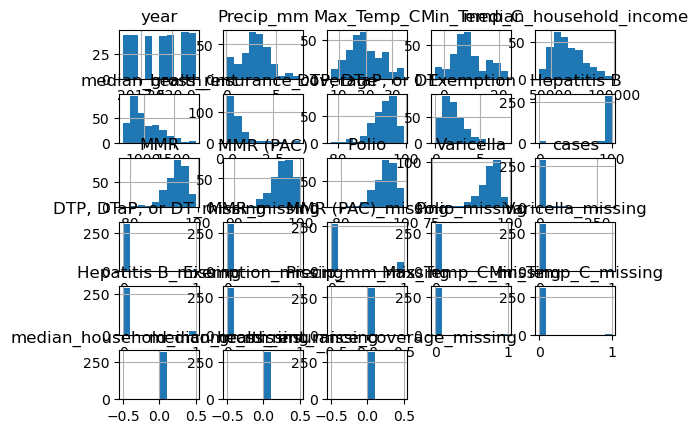

In [25]:
# Histograms
df.hist()
plt.show()

**Well-Distributed Variables:Max_Temp_C, Min_Temp_C, and Precip_mm,median_household_income,MMR, Polio, Varicella, DTP, DTaP, or DT**

**Highly Skewed or Sparse Variables:cases,exemption,health insurance,hep b**

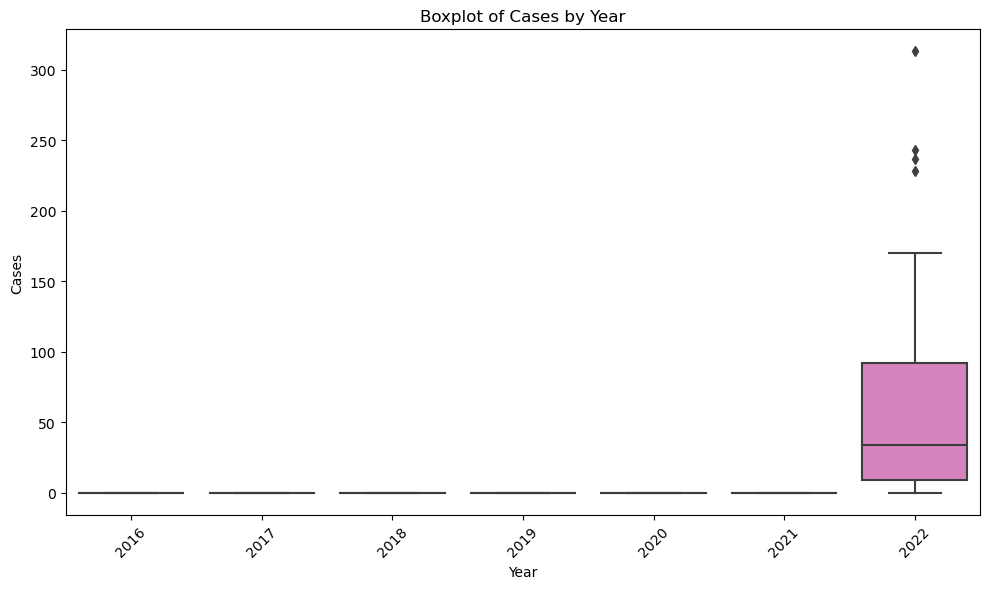

In [26]:
#  Boxplot of cases by year
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='cases', data=df)
plt.title("Boxplot of Cases by Year")
plt.xlabel("Year")
plt.ylabel("Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**For the years 2016-2021 there was nearly zero cases,disease were all under control. However in 2022 there was a sharp increase with a wide interquartile range (IQR) — many states reporting between ~10–100 cases.Outliers above 200 and 300 cases, which are extreme for diseases like MMR or pertussis.Indicates a major resurgence or outbreak in 2022.**



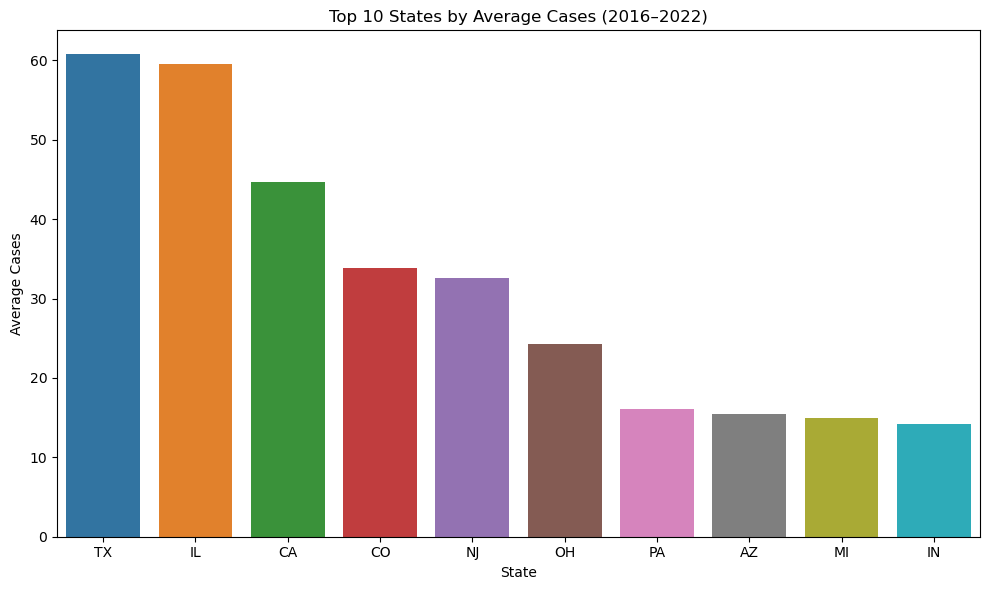

In [27]:
# Top 10 states with highest average cases
top_states = df.groupby("state")["cases"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title("Top 10 States by Average Cases (2016–2022)")
plt.xlabel("State")
plt.ylabel("Average Cases")
plt.tight_layout()
plt.show()

**These findings suggest that geographic features (state-level variables) are critical predictors in your modeling phase.**

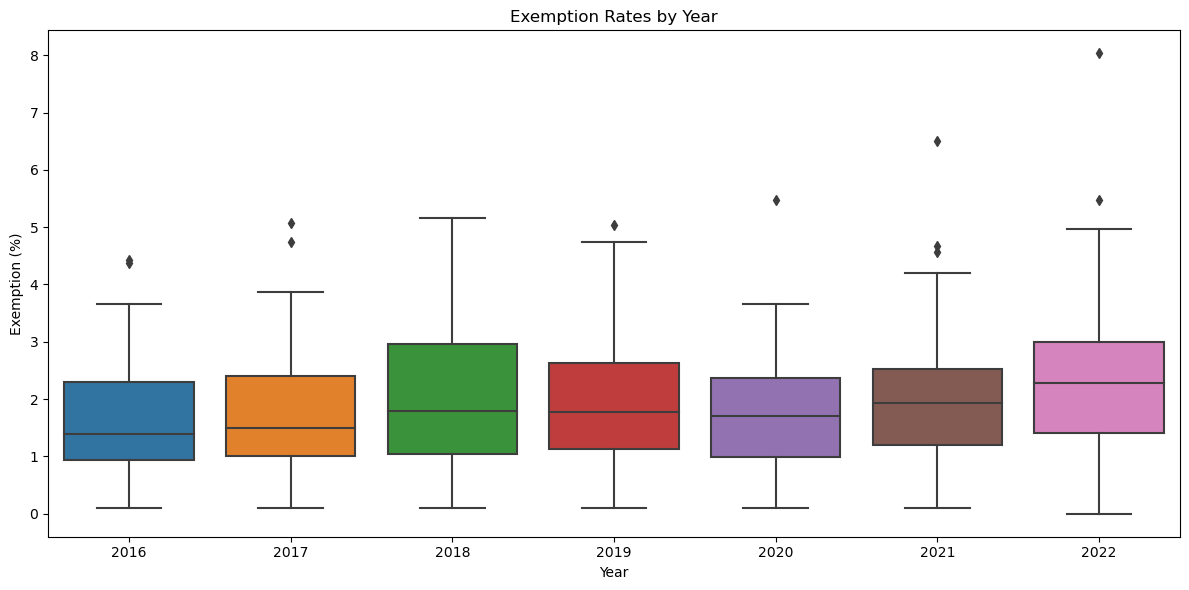

In [89]:
#  Exemption Rates by Year

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="year", y="Exemption")
plt.title("Exemption Rates by Year")
plt.xlabel("Year")
plt.ylabel("Exemption (%)")
plt.tight_layout()
plt.show()

**The median exemption rate increases gradually from 2016 to 2022.This upward trend suggests growing vaccine hesitancy or increased opt-outs over time.**

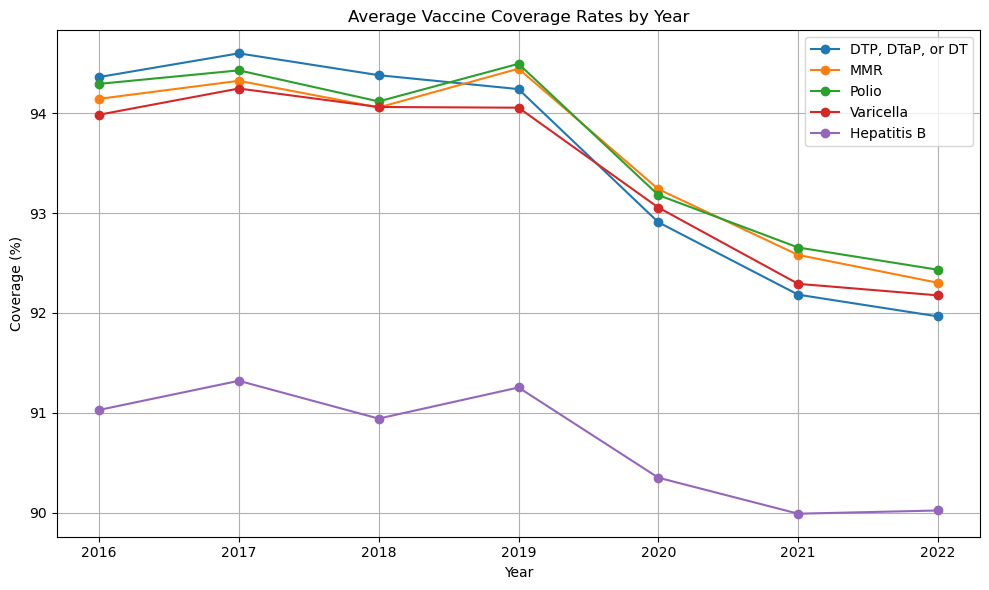

In [90]:
# Average Vaccine Coverage Rates by Year

vaccine_cols = ['DTP, DTaP, or DT', 'MMR', 'Polio', 'Varicella', 'Hepatitis B']

coverage_by_year = df.groupby('year')[vaccine_cols].mean()

plt.figure(figsize=(10, 6))
for col in vaccine_cols:
    plt.plot(coverage_by_year.index, coverage_by_year[col], marker='o', label=col)

plt.title("Average Vaccine Coverage Rates by Year")
plt.xlabel("Year")
plt.ylabel("Coverage (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**The line chart of average vaccine coverage from 2016 to 2022 reveals a clear downward trend across all key childhood vaccines, including DTP, DTaP, or DT, MMR, Polio, Varicella, and Hepatitis B. Most vaccines maintained coverage rates above 94% until 2019, after which coverage began to steadily decline, coinciding with the onset of the COVID-19 pandemic. By 2022, average coverage for several vaccines dropped below 92%, with Hepatitis B consistently showing the lowest rates. This decline aligns with the observed rise in exemption rates and the sharp increase in reported disease cases in 2022, highlighting a growing vulnerability to outbreaks. These findings support the importance of including vaccination and exemption rates as core features in modeling disease resurgence risk.**

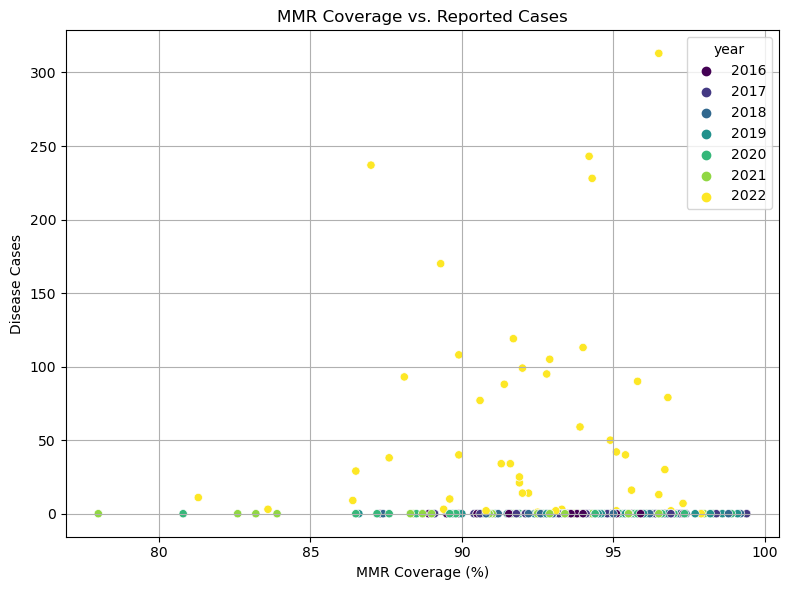

In [91]:
#  MMR Coverage vs Reported Cases

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="MMR", y="cases", hue="year", palette="viridis")
plt.title("MMR Coverage vs. Reported Cases")
plt.xlabel("MMR Coverage (%)")
plt.ylabel("Disease Cases")
plt.grid(True)
plt.tight_layout()
plt.savefig("mmr_vs_cases.png")
plt.show()

**States with lower MMR coverage tend to experience higher case counts, particularly in 2022, which is represented by the yellow points. While years prior to 2022 show relatively low and stable case counts across a range of MMR coverage levels, a sharp increase in cases is evident when MMR rates fall below approximately 92%. This suggests a threshold effect—once MMR coverage drops beneath a certain point, population immunity is insufficient to prevent outbreaks.**

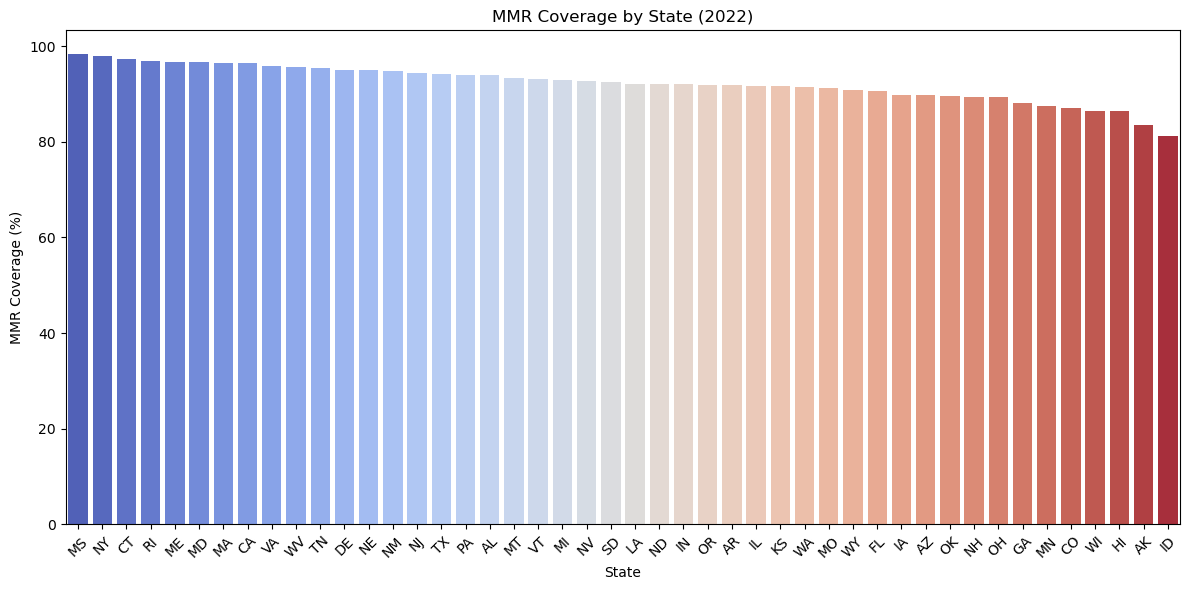

In [31]:
#  MMR Coverage by State for Latest Year

latest_year = df['year'].max()
latest_data = df[df['year'] == latest_year]

plt.figure(figsize=(12, 6))
sns.barplot(data=latest_data.sort_values("MMR", ascending=False), x="state", y="MMR", palette="coolwarm")
plt.title(f"MMR Coverage by State ({latest_year})")
plt.xlabel("State")
plt.ylabel("MMR Coverage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Some states—like Mississippi, New York, and Connecticut—achieved near-perfect coverage close to 99%, others fell notably short. At the lower end of the spectrum are states like Idaho, Alaska, and Hawaii, where coverage drops below 85%, with Idaho reaching just around 81%. This geographic disparity is significant given the earlier finding that outbreak risk increases sharply when MMR coverage dips below approximately 92%.**

C:\Users\emily\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emily\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emily\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emily\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

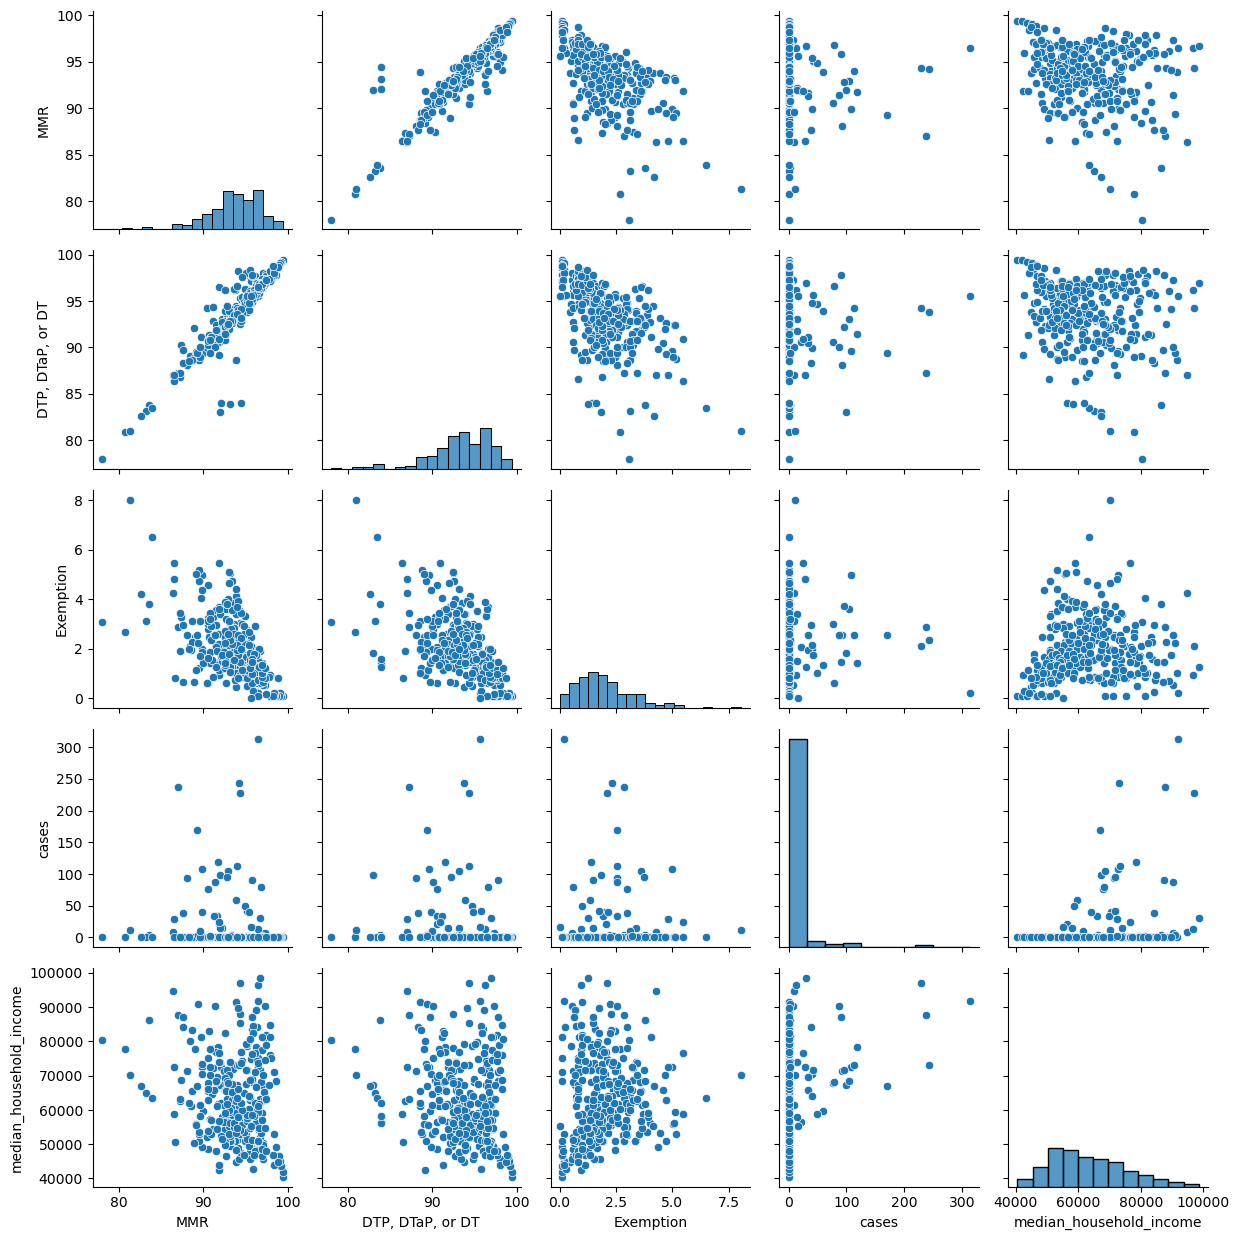

In [32]:

# Pairplot: Vaccine & Cases

selected = ["MMR", "DTP, DTaP, or DT", "Exemption", "cases", "median_household_income"]
sns.pairplot(df[selected].dropna())
plt.tight_layout()
plt.savefig("pairplot_selected_features.png")
plt.show()


**The pair plot reveals strong positive correlation between MMR and DTP/DTaP vaccine coverage, suggesting states with strong immunization maintain high rates across multiple vaccines. Exemption rates are negatively correlated with both MMR and DTP/DTaP, indicating that higher exemptions are associated with lower vaccination coverage. While reported disease cases are mostly concentrated at zero, there’s a visible trend of increased cases in states with lower MMR coverage and higher exemption rates, supporting a link between reduced immunization and outbreak risk. Median household income does not show a strong direct relationship with these variables, though some subtle trends may exist.**

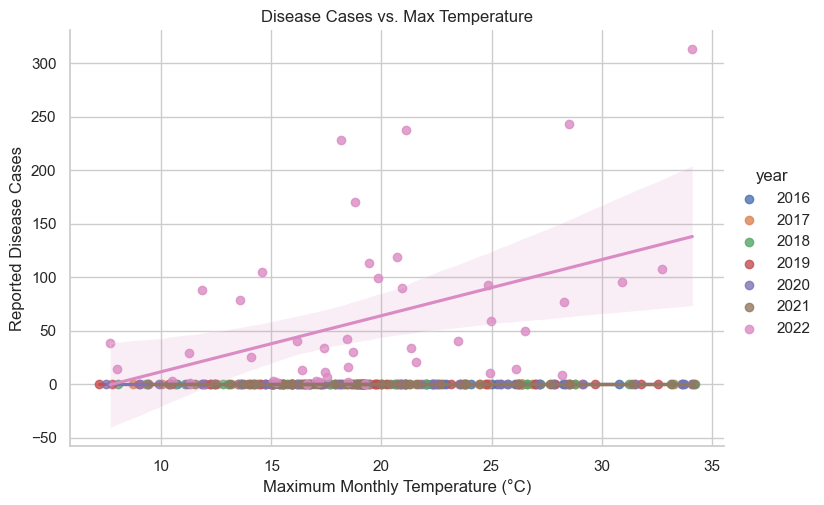

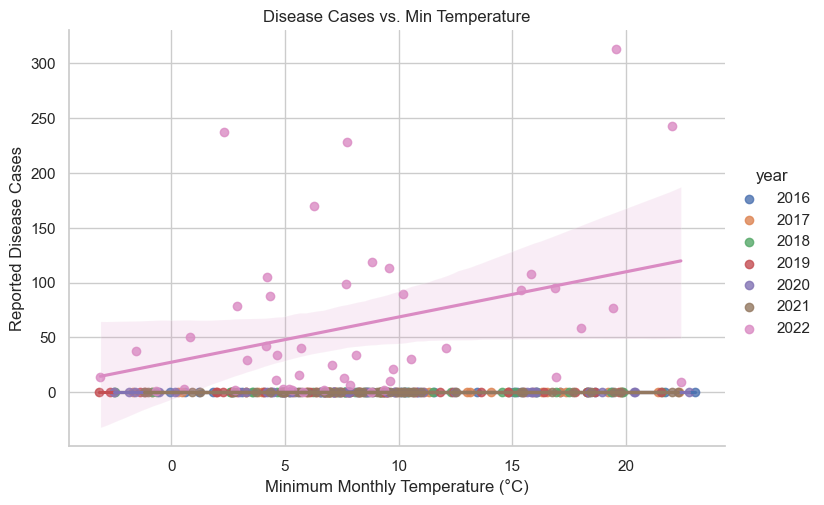

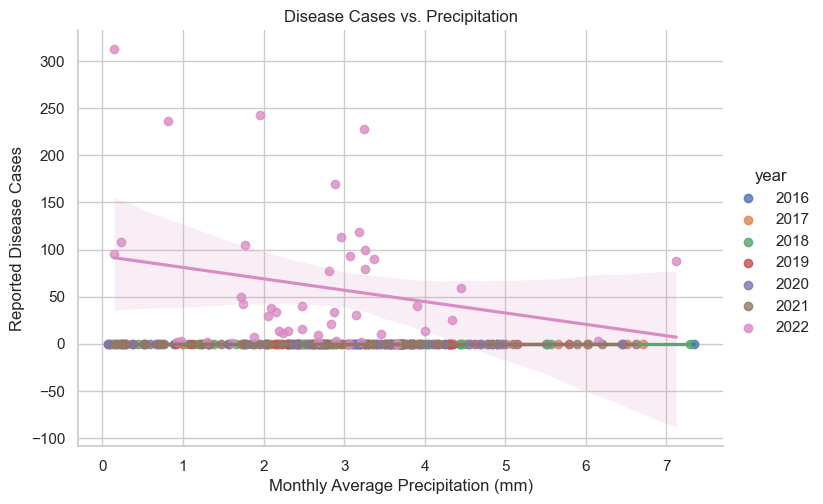

In [35]:
sns.lmplot(data=df, x='Max_Temp_C', y='cases', hue='year', height=5, aspect=1.5)
plt.title("Disease Cases vs. Max Temperature")
plt.xlabel("Maximum Monthly Temperature (°C)")
plt.ylabel("Reported Disease Cases")
plt.show()


sns.lmplot(data=df, x='Min_Temp_C', y='cases', hue='year', height=5, aspect=1.5)
plt.title("Disease Cases vs. Min Temperature")
plt.xlabel("Minimum Monthly Temperature (°C)")
plt.ylabel("Reported Disease Cases")
plt.show()

sns.lmplot(data=df, x='Precip_mm', y='cases', hue='year', height=5, aspect=1.5)
plt.title("Disease Cases vs. Precipitation")
plt.xlabel("Monthly Average Precipitation (mm)")
plt.ylabel("Reported Disease Cases")
plt.show()


**Higher temperatures—both maximum and minimum—are associated with increased disease cases, especially in 2022. This suggests warmer climates may support greater transmission of diseases like MMR and DTP. In contrast, higher precipitation slightly correlates with fewer cases, possibly due to reduced outdoor activity. These patterns highlight how weather conditions can influence outbreak trends.**